# Price of Storage

Graph of the price of storage over time; data taken from http://www.mkomo.com/cost-per-gigabyte-update

In [1]:
import pandas as pd
data = '../data/memory-price.csv'
pd.read_csv(data).head()

,Unnamed: 0,date,driveInfo,sizeInMb,cost,dollarsPerGb
0,0,1980 January,Morrow Designs,26.0,5000.0,193000.0
1,1,1980 July,North Star,18.0,4199.0,233000.0
2,2,1981 September,Apple,5.0,3500.0,700000.0
3,3,1981 November,Seagate,5.0,1700.0,340000.0
4,4,1981 December,VR Data Corp.,6.3,2895.0,460000.0


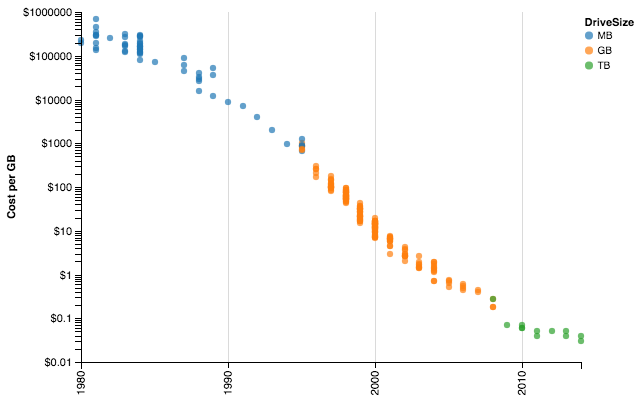

In [2]:
from altair import *

DriveSize = Formula(field='DriveSize',
                    expr=('{x}<1E3?"MB":{x}<1E6?"GB":"TB"'
                          ''.format(x='datum.sizeInMb')))

Chart(data).mark_circle().encode(
    x=X('date:T', timeUnit='year', axis=Axis(title=' ')),
    y=Y('dollarsPerGb:Q', scale=Scale(type='log'),
        axis=Axis(grid=False, format='$', title='Cost per GB')),
    color=Color('DriveSize:N',
                scale=Scale(domain=['MB', 'GB', 'TB']))
).transform_data(
    calculate=[DriveSize]
)